In [241]:
import numpy as np
import random

def step(rels, pb, pr, pn):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(range(0, baby_index) + range(baby_index+1, N)) # excludes dead index
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = 0
    rels[baby_index] = 0 
        
    parent_friends = rels[parent_index]==1 

    r = np.random.random(size=N)
    rels[baby_index, r<pr]=1
    rels[r<pr, baby_index]=1
    
    rels[baby_index, parent_index] = 1
    rels[parent_index, baby_index] = 1

    rels[baby_index, baby_index] = 0

    #for parent friends
    l = len(rels[baby_index, parent_friends])
    r = np.random.random(size=l)
    r = r<pn
    rels[baby_index, parent_friends] = r
    rels[parent_friends, baby_index] = r

In [242]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))

    #run steps
    for _ in xrange(steps):
        step(rels,pb, pr, pn)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr05

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr03

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr01

[33.76, 34.62, 35.48, 37.52, 38.18, 40.62, 42.1, 42.58, 44.88, 48.24, 49.92, 52.86, 57.5, 59.02, 62.82, 66.38, 71.76, 76.26, 82.26, 90.48, 99.0]
[23.5, 24.9, 25.0, 26.74, 27.92, 28.48, 30.24, 32.88, 33.34, 34.86, 36.74, 40.38, 42.64, 46.18, 50.98, 54.34, 60.42, 65.06, 73.36, 86.22, 99.0]
[10.08, 10.0, 10.3, 10.72, 12.42, 13.12, 13.66, 13.74, 14.94, 16.0, 17.8, 19.1, 22.18, 23.0, 26.06, 29.62, 37.26, 41.9, 50.88, 65.24, 97.74]
CPU times: user 4.5 s, sys: 62.8 ms, total: 4.57 s
Wall time: 4.77 s


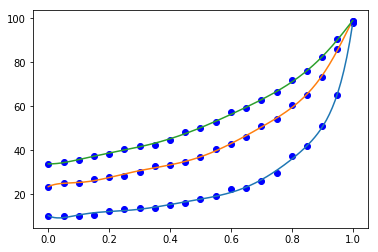

In [243]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()

In [75]:
import random
import numpy

N = 10000000
%timeit [random.random() for _ in xrange(N)]
%timeit numpy.random.random(size=N)
%timeit range(N)
%timeit for _ in xrange(N): None
%timeit for _ in range(N): None

1 loop, best of 3: 1.2 s per loop
10 loops, best of 3: 145 ms per loop
1 loop, best of 3: 200 ms per loop
1 loop, best of 3: 277 ms per loop
1 loop, best of 3: 467 ms per loop
